In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import History 
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import pandas_datareader.data as web
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataframe2.csv to dataframe2.csv


### Reading in the data

In [39]:
df = pd.read_csv('dataframe2.csv')

In [40]:
df.columns

Index(['date', 'LOW_x', 'HIGH_x', 'PRICE_x', 'CLOSINGBID_x', 'CLOSEINGASK_x',
       'VOL_x', 'LOW_y', 'HIGH_y', 'PRICE_y', 'CLOSINGBID_y', 'CLOSEINGASK_y',
       'VOL_y', 'dailyreturns', 'totalcap', 'chngcap', 'divfac', 'spread',
       'shrout', 'SDT_RET', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
       'SPYRET', 'TMW_SPYRET', 'UP_DWN', 'X5', 'X10', 'X15', 'X20', 'X25',
       'X30', 'X35', 'X40', 'X45', 'X50', 'X55', 'X60', 'X65', 'X70', 'X75',
       'X80', 'X85', 'X90', 'X95', 'SINTMWSPYRET'],
      dtype='object')

We only look at the dates from 2011 to end of 2021

In [41]:
df1 = df[df['date']>= '2010-12-31']

In [42]:
df1 = df1.reset_index(drop=True)

Only pulling the variabels that we want

In [43]:
df1 = df1.drop(columns= ['LOW_y','HIGH_y','PRICE_y','CLOSINGBID_y','VOL_y','SPYRET','TMW_SPYRET','UP_DWN','Mkt-RF','SINTMWSPYRET'])

In [44]:
train_size = round(0.7*len(df1))

In [45]:
training_set = df1.iloc[:train_size, 1:].values
test_set =df1.iloc[train_size:, 1:].values

Scaling the data to be between 0 and 1

In [46]:
sc = MinMaxScaler(feature_range = (0, 1))
x_training_set_scaled = sc.fit_transform(training_set[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]])
y_training_set_scaled = sc.fit_transform(training_set[:,2:3])

This creates a function that will loop through 30 rolling days to predict the thirty first day this will be our prediction function

In [47]:
X_train = []
y_train = []
for i in range(30, train_size):
    X_train.append(x_training_set_scaled[i-30:i,:])
    y_train.append(y_training_set_scaled[i,:])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 37))

this does the same as above but for the testing data

In [48]:
x_test_set_scaled = sc.fit_transform(test_set[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]])
y_test_set_scaled = sc.fit_transform(test_set[:,2:3])
X_test = []
y_test = []
for i in range(30, (len(df1) - train_size)):
    X_test.append(x_test_set_scaled[i-30:i,:])
    y_test.append(y_test_set_scaled[i,:])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 37))

In [49]:
epochs = 50

Creating and training 4 LSTM layers.

In [50]:
#def lstm(x_train,y_train,x_test,y_test,epochs):
history = History()
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 37)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = epochs, batch_size = 20,callbacks=[history])

predicted_stock_price = model.predict(X_test)

mse = mean_squared_error(y_test,predicted_stock_price)
loss = history.history['loss']

#return mse
print(loss)

Epoch 1/50
87/87 [==============================] - 13s 62ms/step - loss: 0.0186
Epoch 2/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0042
Epoch 3/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0038
Epoch 4/50
87/87 [==============================] - 5s 59ms/step - loss: 0.0034
Epoch 5/50
87/87 [==============================] - 5s 60ms/step - loss: 0.0026
Epoch 6/50
87/87 [==============================] - 5s 60ms/step - loss: 0.0029
Epoch 7/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0029
Epoch 8/50
87/87 [==============================] - 5s 62ms/step - loss: 0.0026
Epoch 9/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0022
Epoch 10/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0020
Epoch 11/50
87/87 [==============================] - 5s 61ms/step - loss: 0.0023
Epoch 12/50
87/87 [==============================] - 5s 62ms/step - loss: 0.0020
Epoch 13/50
87/87 [=================

### As you can see this does not perform any better after 50 epochs than the simpler model from 'Simpledata_LSTM'.

### When we ran through 100 epochs we got better loss numbers but we got worst R^2 on the regression below

### it also functioned worse as a guide for our portfolio

Both of these cells convert the functions back to the pre scaled functions

In [51]:
predicted_stock_price = model.predict(X_test)

In [52]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [53]:
y_test = sc.inverse_transform(y_test)

Plotting the outcome of the predictions vs the actuals

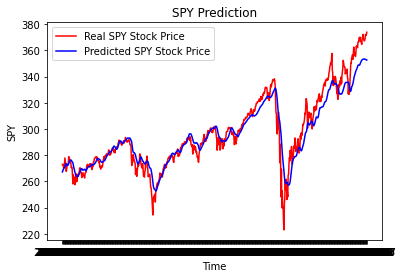

In [54]:
# Visualising the results
plt.plot(df1.loc[train_size:len(df1)-31, 'date'],y_test, color = 'red', label = 'Real SPY Stock Price')
plt.plot(df1.loc[train_size:len(df1)-31, 'date'],predicted_stock_price, color = 'blue', label = 'Predicted SPY Stock Price')
#plt.xticks(np.arange(0,459,50))
plt.title('SPY Prediction')
plt.xlabel('Time')
plt.ylabel('SPY')
plt.legend()
plt.show()

In [55]:
regression = pd.DataFrame(y_test)
regression['predict'] = predicted_stock_price

In [56]:
regression.columns = ['real','predict']

We run this regression to check and see how the model works in explaining the actual stock pric

In [57]:
regression

,real,predict
0,273.03000,267.198547
1,273.10999,268.300323
2,271.39999,269.114929
3,270.04999,269.752716
4,270.39999,270.276978
...,...,...
720,369.00000,353.254730
721,372.17001,353.135590
722,371.45999,352.887634
723,371.98999,352.632965


In [58]:
model = ols('predict ~ real',regression).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                predict   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     8482.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:52:36   Log-Likelihood:                -2398.4
No. Observations:                 725   AIC:                             4801.
Df Residuals:                     723   BIC:                             4810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1190      2.529     24.961      0.000      58.155      68.084
real           0.7818      0.008     92.096      0.000       0.765       0.798
==============================================================================
Omnibus:                      220.274   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1268.641
Skew:                           1.239   Prob(JB):                    3.30e-276
Kurtosis:                       8.988   Cond. No.                     3.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""